In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print("Training Samples:",X_train.shape) // flattened pixel input
print("Test Samples:",X_test.shape)

Training Samples: (60000, 28, 28)
Test Samples: (10000, 28, 28)


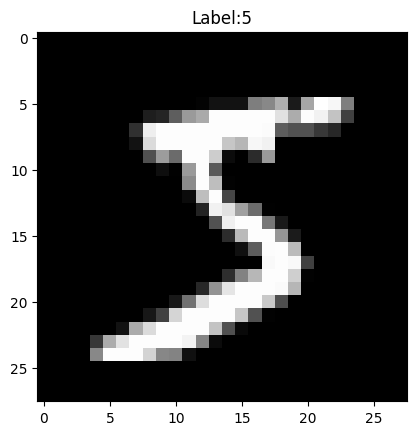

In [4]:
plt.imshow(X_train[0],cmap='gray')
plt.title(f"Label:{y_train[0]}")
plt.show()

In [ ]:
X_train=X_train_astype("float32")/255.0
X_test=X_test_astype("float32")/255.0

In [6]:
X_train=X_train.reshape(-1,28*28)  
X_test=X_test.reshape(-1,28*28)

In [7]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [8]:
print(y_train_cat[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

model=Sequential()
#Input Layer + first hidden layer 
#128 neurons each connected to all 784 inputs
model.add(Dense(units=128,input_shape=(784,),activation='relu'))
#activation => ReLU after weighted sum


#second hidden layer
model.add(Dense(units=64,activation='relu'))

#Output layer(10 classes)
#Dense(10) last layer has 10 neurons (1 for each class)
#softmax => outputs a probability distribution over the 10 digits
model.add(Dense(units=10,activation='softmax'))


#Input -> Dense(128,relu)->Dense(64,relu)->Dense(10,softmax)

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    loss='categorical_crossentropy',  #one-hot multi-class classification
    optimizer='adam',
    metrics=['accuracy']
)


In [17]:
history=model.fit(
    X_train,y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
844/844 - 12s - 14ms/step - accuracy: 0.8537 - loss: 2.3523 - val_accuracy: 0.9207 - val_loss: 0.5510
Epoch 2/10
844/844 - 10s - 12ms/step - accuracy: 0.9183 - loss: 0.4756 - val_accuracy: 0.9330 - val_loss: 0.4385
Epoch 3/10
844/844 - 11s - 13ms/step - accuracy: 0.9351 - loss: 0.3167 - val_accuracy: 0.9495 - val_loss: 0.2535
Epoch 4/10
844/844 - 10s - 12ms/step - accuracy: 0.9477 - loss: 0.2251 - val_accuracy: 0.9500 - val_loss: 0.2396
Epoch 5/10
844/844 - 10s - 11ms/step - accuracy: 0.9522 - loss: 0.2035 - val_accuracy: 0.9550 - val_loss: 0.2165
Epoch 6/10
844/844 - 11s - 13ms/step - accuracy: 0.9572 - loss: 0.1776 - val_accuracy: 0.9567 - val_loss: 0.2077
Epoch 7/10
844/844 - 9s - 10ms/step - accuracy: 0.9614 - loss: 0.1515 - val_accuracy: 0.9562 - val_loss: 0.2161
Epoch 8/10
844/844 - 9s - 11ms/step - accuracy: 0.9645 - loss: 0.1393 - val_accuracy: 0.9575 - val_loss: 0.1703
Epoch 9/10
844/844 - 9s - 11ms/step - accuracy: 0.9675 - loss: 0.1182 - val_accuracy: 0.9630 - val

In [18]:
test_loss,test_acc=model.evaluate(X_test,y_test_cat)
print(f"\nTest Accuracy:{test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9533 - loss: 0.2250

Test Accuracy:0.9533


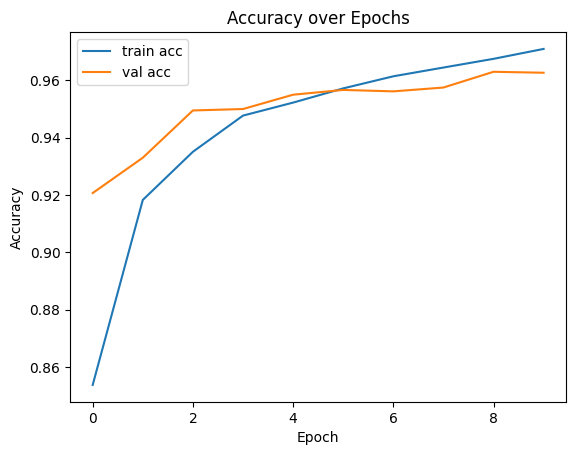

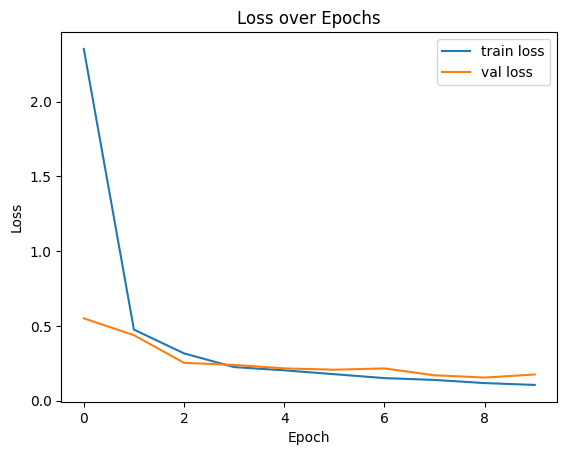

In [19]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
